# ML in Healthcare Apps, Homework #9


## Question 1

Noise in the digital images can be typically identified as:
- Random changes in pixel intensity

## Question 2

Image denoising techniques discussed in the class attempt to fix noisy pixels using:
- Their neighbouring pixels

## Question 3

If all coefficients α in multi-scale synthesis are set to 1, the resulting “enhanced” image Q will be:
- The same as the original


## Question 4

in function Split(x) explained in the class, which of the two output images (L, D) has width and height equal to one half of the original width/height of X?
- Low frequency Image

## Question 5
In function Split(X) explained in the class, output image D is also known as
- High-frequency image

## Question 6

Multiscale image enhancement explained in the class was used to
- Make image details more visible

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'pydicom'

In [28]:
def LoadImage(nImg=1, dNoise=0):
    "Image loading - taken from HW9"
    if nImg == 1:
        Img = Image.open("./Data/Lenna.bmp")

    Img = np.array(Img)
    Img = Img.astype(float)

    if dNoise > 0:
        #Add uniform noise to all pixels
        nRows, nCols = np.shape(Img)
        Img = Img + np.random.uniform(-dNoise, dNoise, (nRows, nCols))

    plt.figure("Loaded Image")
    plt.imshow(Img, cmap=plt.cm.bone)

    return Img

In [38]:

def ImageFilter(Img, r):
    """Average pixel values from pixels in neighbourhood of radius r
    Taken from slides
    :param Img: Image array
    :param r: Radius r of pixels to average
    :return Denoised image
    """
    Img = Img.astype(float)
    nRows, nCols = np.shape(Img)

    Filtered = Img.copy()

    for nr in range(r+1, nRows-r-2):
        for nc in range(r+1, nCols-r-2):
            Filtered[nr][nc] = np.mean(Img[nr-r:nr+r, nc-r:nc+r])
    
    f, axarr = plt.subplots(2, figsize=(15,15))
    axarr[0].imshow(Img, cmap=plt.cm.bone)
    axarr[1].imshow(Filtered, cmap=plt.cm.bone)

    return Filtered

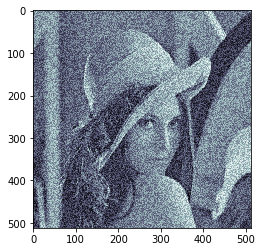

In [39]:
#Question 7
lenna_noisy = LoadImage(nImg=1, dNoise=60)

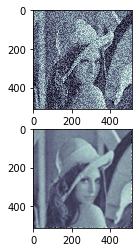

In [40]:
lenna_denoised = ImageFilter(lenna_noisy, 5)

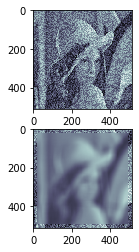

In [37]:
# Question 8
lenna_denoised_bad = ImageFilter(lenna_noisy, 20)

Increasing the neighbourhood over which pixels are averaged results in blurrier images

In [48]:
def Split(X):
    "Image decomposition - taken from HW9"
    
    # Get original image sizes
    nRows, nCols = np.shape(X)

    # Find half sizes
    nRows2 = nRows // 2 
    nCols2 = nCols // 2

    # Initialize output images
    L = np.zeros((nRows2, nCols2))
    D = np.zeros((nRows, nCols))
    for nr2 in range(nRows2):
        nr = 2*nr2
        for nc2 in range(nCols2):
            nc = 2*nc2
            avg = np.mean(X[nr:nr+1, nc:nc+1])
            L[nr2, nc2] = avg
            D[nr, nc] = X[nr, nc] - avg
            D[nr+1,nc] = X[nr+1, nc] - avg
            D[nr, nc+1] = X[nr, nc+1] - avg
            D[nr+1, nc+1] = X[nr+1, nc+1] - avg
    return (L,D)


def Merge(L,D):
    X = D.copy()
    nRows, nCols = np.shape(X)
    for nr in range(nRows-1):
        nr2 = nr // 2
        for nc in range(nCols-1):
            nc2 = nc // 2
            X[nr, nc] = X[nr, nc] + L[nr2, nc2]
    X = np.minimum(np.maximum(X, 0), 255)
    return X

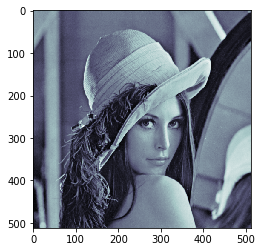

In [49]:
lenna = LoadImage()

In [50]:
# Question 9
L1, D1 = Split(lenna)

In [64]:
D1.shape

(512, 512)

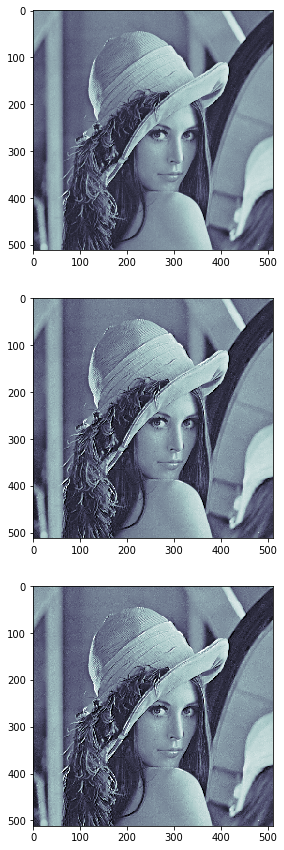

In [57]:
def multiple_enhancements(image, alphas=()):
    """Given an image and a collection of alpha values,
    the images are downsized and the detailed layers
    are multiplied by the alpha values
    """
    l = image.copy()
    f, axarr = plt.subplots(len(alphas),figsize=(15,15))
    for i, alpha in enumerate(alphas):
        L, D = Split(l)
        l = Merge(L, D*alpha)
        # plot image after each transformation
        axarr[i].imshow(l, cmap=plt.cm.bone)

multiple_enhancements(lenna, alphas=(1.5, 1.5, 1.1))

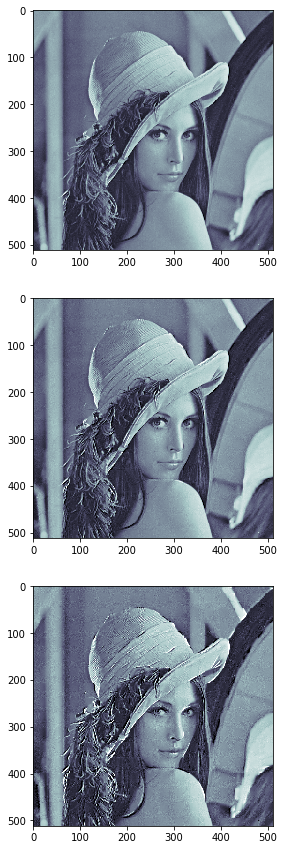

In [58]:
multiple_enhancements(lenna, alphas=(1.5, 1.5, -1.1))

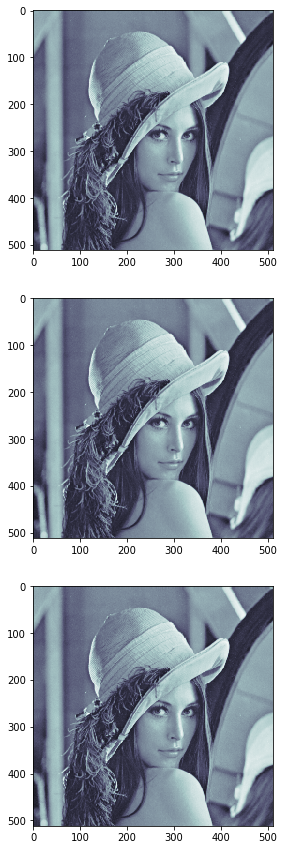

In [59]:
multiple_enhancements(lenna, alphas=(0.5, 0.5, 0.1))
# the best

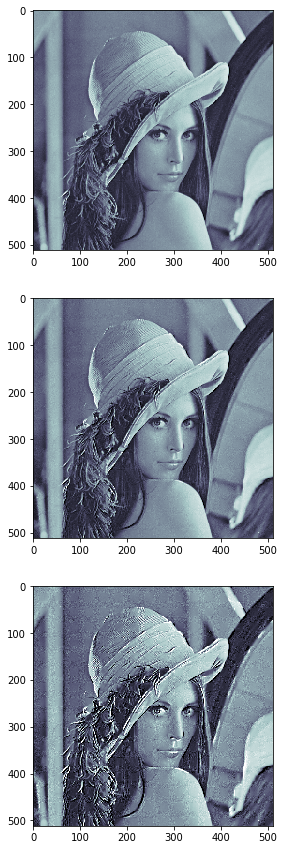

In [60]:
multiple_enhancements(lenna, alphas=(1.5, 1.5, 2.1))

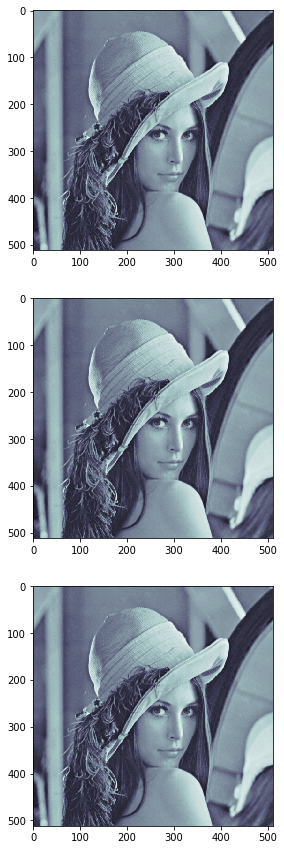

In [61]:
multiple_enhancements(lenna, alphas=(1, 1, 1))